# Experiment 6: Classification modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/exp5_aids.csv")

In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0
5,0,25,1,25.0,1,1,0,27954.0,152.0,23,0
6,1,51,1,8.0,0,0,1,2630.0,26.0,209,0
7,1,38,1,28.0,1,0,0,2630.0,26.0,51,0
8,0,45,1,28.0,0,0,1,55873.0,124.0,262,0
9,1,42,1,28.0,0,0,1,27801.0,122.0,217,1


In [ ]:
# Define features and target variable
X = df.drop(columns=['Response'])  # Features
y = df['Response']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. K-Nearest Neighbors (KNN)  

In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.8283
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     63789
           1       0.48      0.40      0.43     12642

    accuracy                           0.83     76431
   macro avg       0.68      0.66      0.67     76431
weighted avg       0.82      0.83      0.82     76431

Confusion Matrix:
 [[58258  5531]
 [ 7591  5051]]


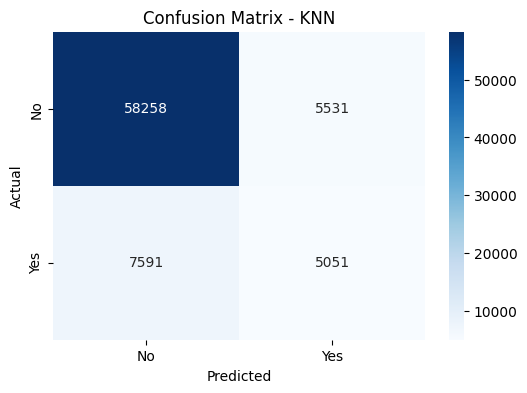

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

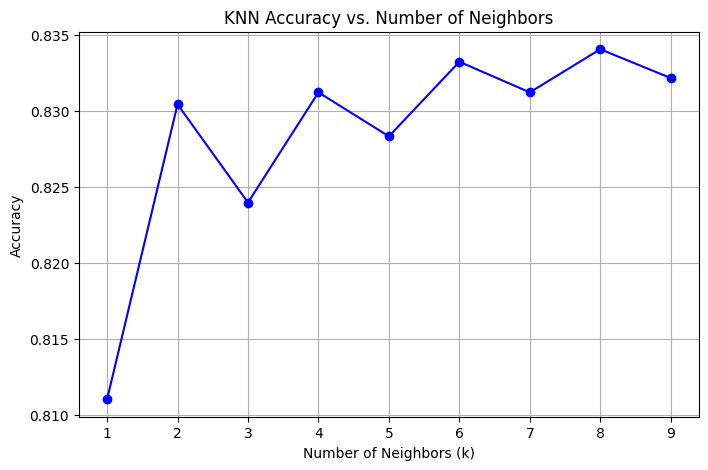

In [ ]:
# Trying different values of k to see the accuracy trend
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid()
plt.show()

# 2.Naive Bayes

In [ ]:
# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Naïve Bayes Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Naïve Bayes Accuracy: 0.7010
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78     63789
           1       0.35      0.99      0.52     12642

    accuracy                           0.70     76431
   macro avg       0.68      0.82      0.65     76431
weighted avg       0.89      0.70      0.74     76431

Confusion Matrix:
 [[41112 22677]
 [  178 12464]]


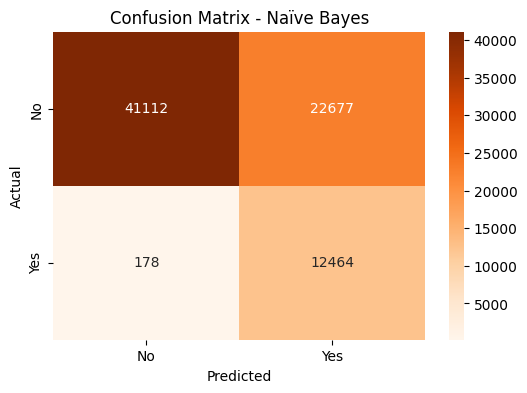

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()


# 3. Support Vector Machines (SVMs)

In [ ]:
# Train Support Vector Machine classifier
svm = SVC(kernel='linear', C=1.0)  # Linear kernel
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.8346
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     63789
           1       0.00      0.00      0.00     12642

    accuracy                           0.83     76431
   macro avg       0.42      0.50      0.45     76431
weighted avg       0.70      0.83      0.76     76431

Confusion Matrix:
 [[63789     0]
 [12642     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


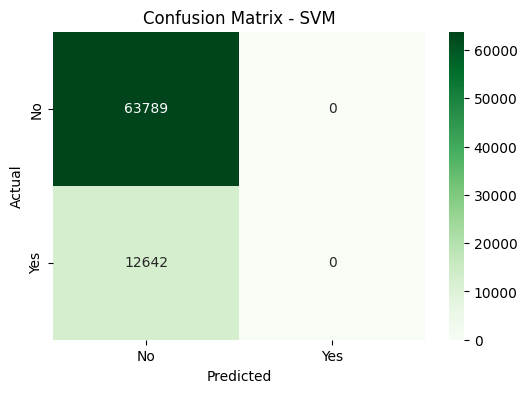

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# 4. Decision Tree

In [ ]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limiting depth to prevent overfitting
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.8346
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     63789
           1       0.00      0.00      0.00     12642

    accuracy                           0.83     76431
   macro avg       0.42      0.50      0.45     76431
weighted avg       0.70      0.83      0.76     76431

Confusion Matrix:
 [[63789     0]
 [12642     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


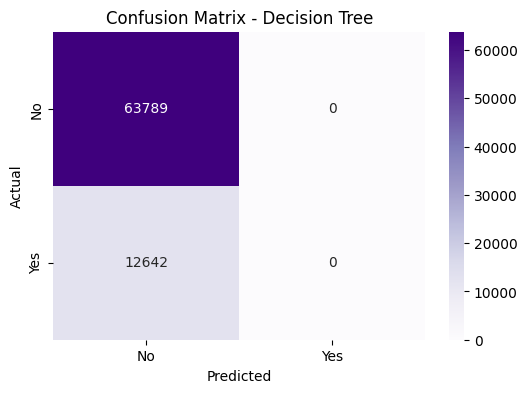

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

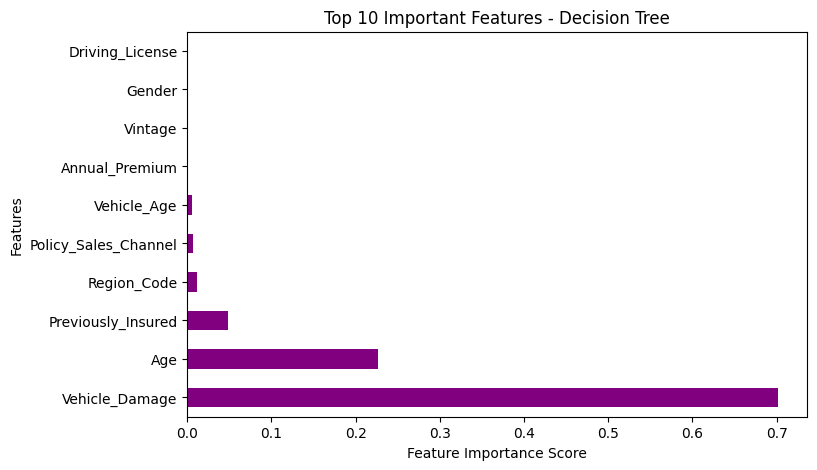

In [ ]:
# Plot feature importances
plt.figure(figsize=(8,5))
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Decision Tree")
plt.show()

In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)  # Using k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

KNN Accuracy: 0.8340
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     63789
           1       0.50      0.28      0.36     12642

    accuracy                           0.83     76431
   macro avg       0.68      0.61      0.63     76431
weighted avg       0.81      0.83      0.81     76431

Confusion Matrix:
 [[60187  3602]
 [ 9082  3560]]


In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.8338
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     63789
           1       0.50      0.28      0.36     12642

    accuracy                           0.83     76431
   macro avg       0.68      0.61      0.63     76431
weighted avg       0.81      0.83      0.81     76431

Confusion Matrix:
 [[60138  3651]
 [ 9055  3587]]
